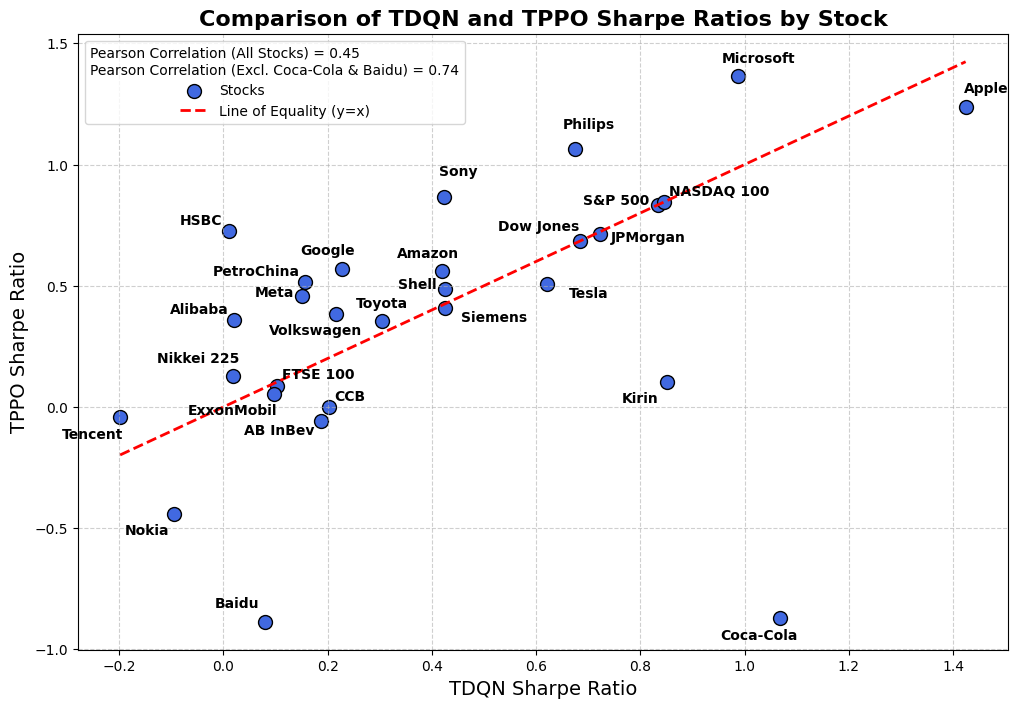

In [118]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Sharpe Ratios for TDQN and PPO strategies
tdqn_sharpe_ratios = [0.684, 0.834, 0.845, 0.103, 0.019, 0.227, 1.424, 0.151, 0.419, 0.987,
                      -0.094, 0.675, 0.426, 0.080, 0.021, -0.198, 0.424, 0.722, 0.011, 0.202,
                      0.098, 0.425, 0.156, 0.621, 0.216, 0.304, 1.068, 0.187, 0.852]
ppo_sharpe_ratios = [0.684, 0.834, 0.845, 0.088, 0.128, 0.570, 1.239, 0.456, 0.560, 1.364,
                     -0.440, 1.063, 0.410, -0.886, 0.357, -0.043, 0.868, 0.713, 0.725, -0.001,
                     0.055, 0.488, 0.514, 0.508, 0.385, 0.354, -0.871, -0.058, 0.104]

# Stock names corresponding to the tickers
stocks = ['Dow Jones', 'S&P 500', 'NASDAQ 100', 'FTSE 100', 'Nikkei 225',
          'Google', 'Apple', 'Meta', 'Amazon', 'Microsoft',
          'Nokia', 'Philips', 'Siemens', 'Baidu', 'Alibaba',
          'Tencent', 'Sony', 'JPMorgan', 'HSBC', 'CCB',
          'ExxonMobil', 'Shell', 'PetroChina', 'Tesla', 'Volkswagen',
          'Toyota', 'Coca-Cola', 'AB InBev', 'Kirin']

# Calculate the Pearson correlation coefficient for all stocks
correlation_all, _ = pearsonr(tdqn_sharpe_ratios, ppo_sharpe_ratios)

# Exclude Coca-Cola and Baidu
tdqn_excl = [tdqn_sharpe_ratios[i] for i in range(len(stocks)) if stocks[i] not in ['Coca-Cola', 'Baidu']]
ppo_excl = [ppo_sharpe_ratios[i] for i in range(len(stocks)) if stocks[i] not in ['Coca-Cola', 'Baidu']]

# Calculate the Pearson correlation coefficient excluding Coca-Cola and Baidu
correlation_excl, _ = pearsonr(tdqn_excl, ppo_excl)

plt.figure(figsize=(12, 8))
plt.scatter(tdqn_sharpe_ratios, ppo_sharpe_ratios, color='royalblue', s=100, edgecolor='black', label='Stocks')
plt.plot([min(tdqn_sharpe_ratios), max(tdqn_sharpe_ratios)],
         [min(tdqn_sharpe_ratios), max(tdqn_sharpe_ratios)],
         'r--', linewidth=2, label='Line of Equality (y=x)')  # Line of equality

# Adding labels and title
plt.xlabel('TDQN Sharpe Ratio', fontsize=14)
plt.ylabel('TPPO Sharpe Ratio', fontsize=14)
plt.title('Comparison of TDQN and TPPO Sharpe Ratios by Stock', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)

# Display the Pearson correlation coefficients in the legend
plt.legend(fontsize=10, title=f'Pearson Correlation (All Stocks) = {correlation_all:.2f}\nPearson Correlation (Excl. Coca-Cola & Baidu) = {correlation_excl:.2f}')

# Adjusting the label positions to reduce overlap and improve readability
offsets = {
    'Dow Jones': (-30, 8), 'S&P 500': (-30, 0), 'NASDAQ 100': (40, 5),
    'FTSE 100': (30, 5), 'Nikkei 225': (-25, 10), 'Google': (-10, 10),
    'Apple': (15, 10), 'Meta': (-20, 0), 'Amazon': (-10, 10), 'Microsoft': (15, 10),
    'Nokia': (-20, -15), 'Philips': (10, 15), 'Siemens': (35, -10),
    'Baidu': (-20, 10), 'Alibaba': (-25, 5), 'Tencent': (-20, -15),
    'Sony': (10, 15), 'JPMorgan': (35, -5), 'HSBC': (-20, 5),
    'CCB': (15, 5), 'ExxonMobil': (-30, -15),
    'Shell': (-20, 0), 'PetroChina': (-35, 5), 'Tesla': (30, -10),
    'Volkswagen': (-15, -15), 'Toyota': (0, 10), 'Coca-Cola': (-15, -15),
    'AB InBev': (-30, -10), 'Kirin': (-20, -15)
}

# Applying the custom offsets
for i, stock in enumerate(stocks):
    plt.annotate(stock, (tdqn_sharpe_ratios[i], ppo_sharpe_ratios[i]),
                 textcoords="offset points", xytext=offsets[stock], ha='center', fontsize=10, fontweight='bold')

plt.show()
